In [1]:
import os

In [2]:
os.chdir(r"C:\Users\Herold-J\Documents\SVR\Python")
print("Directory changed") 

Directory changed


In [3]:
#import packages
import pandas as pd
import numpy as np
from linearmodels import PooledOLS
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
df = pd.read_excel("JSTdatasetR4.xlsx",sheet_name = "Data")

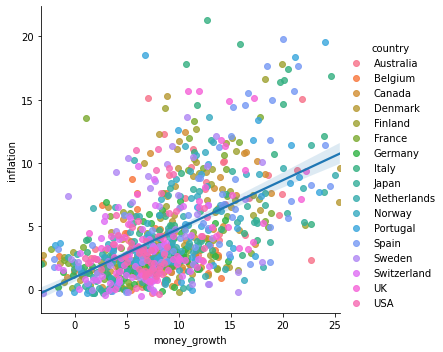

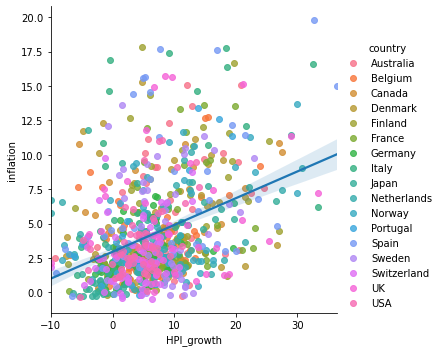

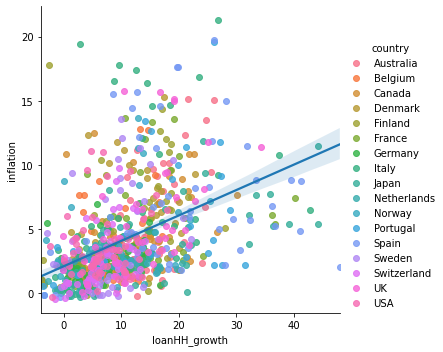

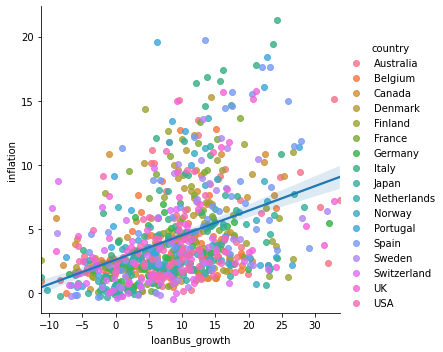

In [7]:
country_list = df["country"].unique()

var_list     = ["cpi","money", "gdp", "thh","tbus","hpnom"]
grouped      = df.groupby("country")[var_list]

new_vars     = ["inflation","money_growth","gdp_growth","loanHH_growth","loanBus_growth","HPI_growth"]

df[new_vars] = (grouped.diff(1)/grouped.shift(1))*100

def windsorize(col_name,lb=1,ub=99):
    df_out = df[col_name].copy()
    bounds = [np.percentile(df_out.dropna(),i) for i in [lb,ub]]
    df_out[(df_out < bounds[0]) | (df_out > bounds[1])] = np.nan
    return df_out

for item in new_vars:
    df[item] = windsorize(item)
    
df["money_multiplier1"] = df["loanHH_growth"]/df["money_growth"]    
df["money_multiplier2"] = df["loanBus_growth"]/df["money_growth"]    

df["money_multiplier1"] = windsorize("money_multiplier1")
df["money_multiplier2"] = windsorize("money_multiplier2")

#Select period 
df = df.loc[np.logical_and(df.year >= 1948,df.year <= 2016)]

df.to_excel("macrohistory_short.xlsx")


# Plots

sns.lmplot(x = "money_growth", y = "inflation", data = df, hue = "country",fit_reg= False)
sns.regplot(x = "money_growth", y= "inflation", data= df, scatter= False)

sns.lmplot(x = "HPI_growth", y = "inflation", data = df, hue = "country",fit_reg= False)
sns.regplot(x = "HPI_growth", y= "inflation", data= df, scatter= False)

sns.lmplot(x = "loanHH_growth", y = "inflation", data = df, hue = "country",fit_reg= False)
sns.regplot(x = "loanHH_growth", y= "inflation", data= df, scatter= False)

sns.lmplot(x = "loanBus_growth", y = "inflation", data = df, hue = "country",fit_reg= False)
sns.regplot(x = "loanBus_growth", y= "inflation", data= df, scatter= False)